In [58]:
import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')
geoapify_key = "819f0915f55842cfa604558744bda981"

# Read File

In [132]:
# read data
csvpath = 'pop_gdp_country.csv'
gdp_df = pd.read_csv(csvpath)
gdp_df.head()

,Country,nominal GDP,abbrev GDP,GDP growth,Population,GDP per capita,Share of World GDP
0,United States,1.948540e+13,"19,485.00",0.0227,325084756,59939,0.2408
1,China,1.223770e+13,"12,238.00",0.0690,1421021791,8612,0.1512
2,Japan,4.872420e+12,"4,872.00",0.0171,127502725,38214,0.0602
3,Germany,3.693200e+12,"3,693.00",0.0222,82658409,44680,0.0456
4,India,2.650730e+12,"2,651.00",0.0668,1338676785,1980,0.0328


In [133]:
gdp_df = gdp_df.rename(columns = {'GDP per capita':'GDP per captial'})
gdp_df.head()

,Country,nominal GDP,abbrev GDP,GDP growth,Population,GDP per captial,Share of World GDP
0,United States,1.948540e+13,"19,485.00",0.0227,325084756,59939,0.2408
1,China,1.223770e+13,"12,238.00",0.0690,1421021791,8612,0.1512
2,Japan,4.872420e+12,"4,872.00",0.0171,127502725,38214,0.0602
3,Germany,3.693200e+12,"3,693.00",0.0222,82658409,44680,0.0456
4,India,2.650730e+12,"2,651.00",0.0668,1338676785,1980,0.0328


# Get Location Data

In [28]:
# get location data
base_url = 'https://api.geoapify.com/v1/geocode/search?'
lat = []
lng = []
for i in gdp_df['Country']:
    params = {'apiKey':geoapify_key,
             'country': i
            } 
    response = requests.get(base_url,params = params).json()
    try:
        lat.append(response['features'][0]['geometry']['coordinates'][1])
        lng.append(response['features'][0]['geometry']['coordinates'][0])
        print(f'{i} is found')
    except:
        print(f'{i} is not found！！！！！')
        lat.append(0)
        lng.append(0)

United States is found
China is found
Japan is found
Germany is found
India is found
United Kingdom is found
France is found
Brazil is found
Italy is found
Canada is found
Russia is found
South Korea is found
Australia is found
Spain is found
Mexico is found
Indonesia is found
Turkey is found
Netherlands is found
Saudi Arabia is found
Switzerland is found
Argentina is found
Sweden is found
Poland is found
Belgium is found
Thailand is found
Iran is found
Austria is found
Norway is found
United Arab Emirates is found
Nigeria is found
Israel is found
South Africa is found
Hong Kong is found
Ireland is found
Denmark is found
Singapore is found
Malaysia is found
Colombia is found
Philippines is found
Pakistan is found
Chile is found
Finland is found
Bangladesh is found
Egypt is found
Vietnam is found
Portugal is found
Czech Republic (Czechia) is found
Romania is found
Peru is found
New Zealand is found
Greece is found
Iraq is found
Algeria is found
Qatar is found
Kazakhstan is found
Hungary

In [30]:
# create location dataframe
country_list = gdp_df['Country'].tolist()
location_df = pd.DataFrame({'Country':country_list,
                            'Lat':lat,
                            'Lng':lng
                            })
location_df.head()

,Country,Lat,Lng
0,United States,39.783730,-100.445882
1,China,35.000074,104.999927
2,Japan,36.574844,139.239418
3,Germany,51.163818,10.447831
4,India,22.351115,78.667743


In [106]:
# merge data frame
new_df = pd.merge(gdp_df,location_df,on = 'Country', how = 'left')
new_df.head()

,Country,nominal GDP,abbrev GDP,GDP growth,Population,GDP per captial,Share of World GDP,Lat,Lng
0,United States,1.948540e+13,"19,485.00",0.0227,325084756,59939,0.2408,39.783730,-100.445882
1,China,1.223770e+13,"12,238.00",0.0690,1421021791,8612,0.1512,35.000074,104.999927
2,Japan,4.872420e+12,"4,872.00",0.0171,127502725,38214,0.0602,36.574844,139.239418
3,Germany,3.693200e+12,"3,693.00",0.0222,82658409,44680,0.0456,51.163818,10.447831
4,India,2.650730e+12,"2,651.00",0.0668,1338676785,1980,0.0328,22.351115,78.667743


# Save Data and Read

In [2]:
# output data to 'NEWDATA.csv', and read it
new_df.to_csv("NEWDATA.csv", index = False)
new_df = pd.read_csv("NEWDATA.csv")
new_df.head()

,Country,nominal GDP,abbrev GDP,GDP growth,Population,GDP per captial,Share of World GDP,Lat,Lng,Country Size
0,United States,1.948540e+13,"19,485.00",0.0227,325084756,59939,0.2408,39.783730,-100.445882,Super Large(>10 trllions)
1,China,1.223770e+13,"12,238.00",0.0690,1421021791,8612,0.1512,35.000074,104.999927,Super Large(>10 trllions)
2,Japan,4.872420e+12,"4,872.00",0.0171,127502725,38214,0.0602,36.574844,139.239418,Large (1 trllions-10 trllions)
3,Germany,3.693200e+12,"3,693.00",0.0222,82658409,44680,0.0456,51.163818,10.447831,Large (1 trllions-10 trllions)
4,India,2.650730e+12,"2,651.00",0.0668,1338676785,1980,0.0328,22.351115,78.667743,Large (1 trllions-10 trllions)


# Summary base on Country Size

In [129]:
# Cut in bins
size_bins = [0, 100000000000, 1000000000000, 10000000000000,100000000000000]
label = ["Small (<100 billions)", "Medium (100 billions-1 trllions)", "Large (1 trllions-10 trllions)",'Super Large(>10 trllions)']
new_df["Country Size"] = pd.cut(new_df['nominal GDP'], size_bins, labels = label)
new_df.head()

,Country,nominal GDP,abbrev GDP,GDP growth,Population,GDP per captial,Share of World GDP,Lat,Lng,Country Size
0,United States,1.948540e+13,"19,485.00",0.0227,325084756,59939,0.2408,39.783730,-100.445882,Super Large(>10 trllions)
1,China,1.223770e+13,"12,238.00",0.0690,1421021791,8612,0.1512,35.000074,104.999927,Super Large(>10 trllions)
2,Japan,4.872420e+12,"4,872.00",0.0171,127502725,38214,0.0602,36.574844,139.239418,Large (1 trllions-10 trllions)
3,Germany,3.693200e+12,"3,693.00",0.0222,82658409,44680,0.0456,51.163818,10.447831,Large (1 trllions-10 trllions)
4,India,2.650730e+12,"2,651.00",0.0668,1338676785,1980,0.0328,22.351115,78.667743,Large (1 trllions-10 trllions)


In [130]:
# Genrate summary
summarycountrycount = new_df.groupby(['Country Size']).count()['Country']
summaryGDP_per_captial = new_df.groupby(['Country Size']).mean()['GDP per captial']
summaryShare_of_World_GDP = new_df.groupby(['Country Size']).sum()['Share of World GDP']
summaryGDP_growth = new_df.groupby(['Country Size']).mean()['GDP growth']
summaryPopulation = new_df.groupby(['Country Size']).mean()['Population']
summary_countrysize = pd.DataFrame({'Country Amount':summarycountrycount,
                                    'AVG Population(million)':summaryPopulation,
                                    'GDP per person':summaryGDP_per_captial,
                                    'Total Share of World':summaryShare_of_World_GDP,
                                    'Avg GDP growth(%)':summaryGDP_growth
                                    })
summary_countrysize['AVG Population(million)'] = summary_countrysize['AVG Population(million)'] / 1000000
summary_countrysize['Avg GDP growth(%)'] = summary_countrysize['Avg GDP growth(%)'] * 100
summary_countrysize

,Country Amount,AVG Population(million),GDP per person,Total Share of World,Avg GDP growth(%)
Country Size,,,,,
Small (<100 billions),115,10.367434,9422.947826,0.0351,3.845043
Medium (100 billions-1 trllions),46,39.829221,23807.021739,0.1858,3.084348
Large (1 trllions-10 trllions),14,188.781024,27633.142857,0.3706,2.605714
Super Large(>10 trllions),2,873.053274,34275.500000,0.3920,4.585000


The r-value is: 0.40682147766622906


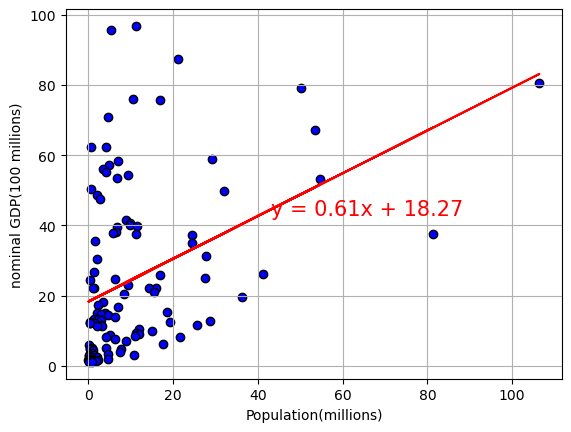

In [131]:
# Regression and plot
small_df = new_df.loc[new_df['Country Size'] == 'Small (<100 billions)']
x_values = small_df['Population']/1000000
y_values = small_df['nominal GDP']/1000000000
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(f'The r-value is: {rvalue}')
sline_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Population(millions)')
plt.ylabel('nominal GDP(100 millions)')
plt.grid()
plt.annotate(sline_eq,(43,43),fontsize=15,color="red")
plt.show()

For small countries(which total GDP is smaller than 100 billions), if population grows up 1 millions, the total GDP will increase around 61 millions dollar.

# Plot map

In [46]:
#reduce columns
map_df = new_df[['Country','nominal GDP','Population','GDP per captial','Lat','Lng']]
map_df.count()

Country            177
nominal GDP        177
Population         177
GDP per captial    177
Lat                177
Lng                177
dtype: int64

In [59]:
# Guam and Northern Mariana Islands is not found, so delete them
cleaned_map_df = map_df.loc[map_df['Lat'] != 0,:]
#Population to million 
cleaned_map_df['Population'] = cleaned_map_df['Population'] / 1000000
cleaned_map_df['Population'] = cleaned_map_df['Population'].astype(int)
#Total GDP to million 
cleaned_map_df['nominal GDP'] = cleaned_map_df['nominal GDP'] / 10000000000
cleaned_map_df['nominal GDP'] = cleaned_map_df['nominal GDP'].astype(int)
#GDP per person for plot map 
cleaned_map_df['GDP per captial size'] = round(cleaned_map_df['GDP per captial'] / 300,2)
cleaned_map_df.head()

,Country,nominal GDP,Population,GDP per captial,Lat,Lng,GDP per captial size
0,United States,1948,325,59939,39.783730,-100.445882,199.80
1,China,1223,1421,8612,35.000074,104.999927,28.71
2,Japan,487,127,38214,36.574844,139.239418,127.38
3,Germany,369,82,44680,51.163818,10.447831,148.93
4,India,265,1338,1980,22.351115,78.667743,6.60


In [60]:
%%capture --no-display
#World map of Populaiton
# Configure the map plot
map_plot_1 = cleaned_map_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    size = 'Population',
    frame_width = 900,
    frame_height = 500,
    color = 'red',
    tiles = "EsriNatGeo",
    hover_cols = ['Country','Population','nominal GDP','GDP per captial'],
    title = 'World map of Population'
)
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Population,Country,nominal GDP,GDP per captial)

In [61]:
%%capture --no-display
#World map of Total GDP

# Configure the map plot
map_plot_2 = cleaned_map_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    size = 'nominal GDP',
    frame_width = 900,
    frame_height = 500,
    color = 'red',
    tiles = "EsriNatGeo",
    hover_cols = ['Country','Population','nominal GDP','GDP per captial'],
    title = 'World map of Total GDP'
)
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (nominal GDP,Country,Population,GDP per captial)

In [62]:
%%capture --no-display
#World map of GDP PER PERSON

# Configure the map plot
map_plot_3 = cleaned_map_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    size = 'GDP per captial size',
    frame_width = 900,
    frame_height = 500,
    color = 'red',
    tiles = "EsriNatGeo",
    hover_cols = ['Country','Population','nominal GDP','GDP per captial'],
    title = 'World map of GDP PER PERSON'
)
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (GDP per captial size,Country,Population,nominal GDP,GDP per captial)